In [50]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [51]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [52]:
folder = 'fashion-mnist-itba-lab-2020q2/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [53]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [54]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

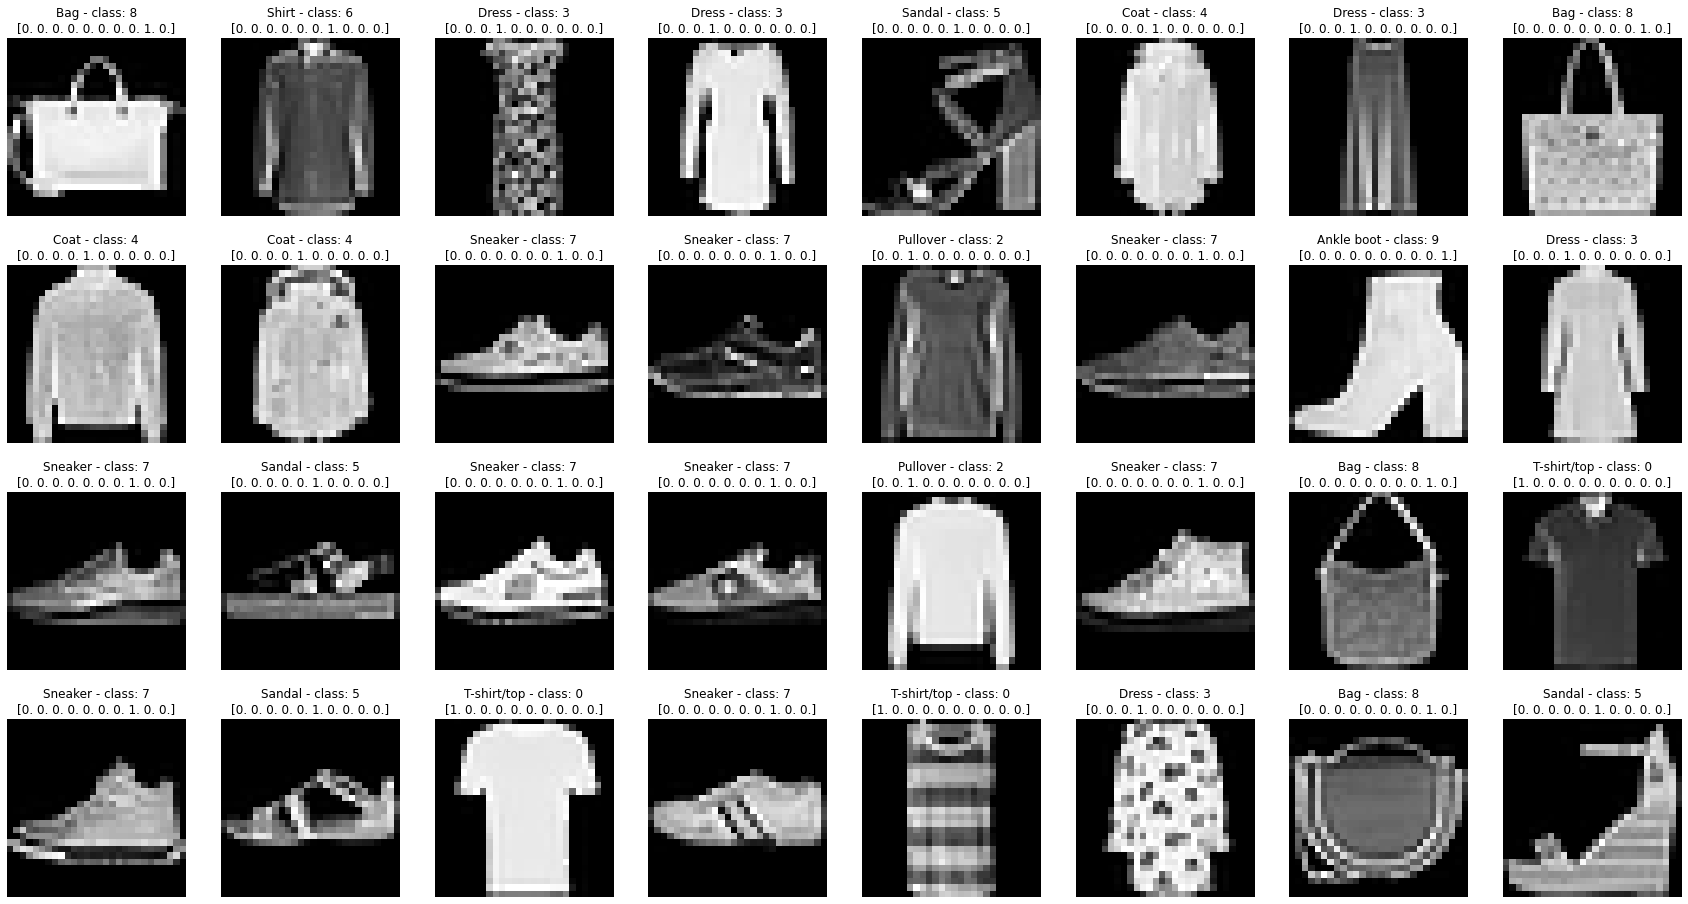

In [55]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [106]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(256, activation='relu'))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Dense(10, activation='softmax'))

model_single_layer.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               200960    
_________________________________________________________________
Salida (Dense)               (None, 10)                2570      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
Total params: 203,640
Trainable params: 203,640
Non-trainable params: 0
_________________________________________________________________


In [107]:
lr = 0.001 
SGD = optimizers.SGD(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [108]:
batch_size = 128
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=50, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Epoch 1/50
422/422 [==============================] - 1s 1ms/step - loss: 7.3956 - accuracy: 0.7571 - val_loss: 2.3120 - val_accuracy: 0.7860
Epoch 2/50
422/422 [==============================] - 1s 1ms/step - loss: 1.2291 - accuracy: 0.7996 - val_loss: 0.7744 - val_accuracy: 0.8090
Epoch 3/50
422/422 [==============================] - 1s 1ms/step - loss: 0.5653 - accuracy: 0.8245 - val_loss: 0.6098 - val_accuracy: 0.8207
Epoch 4/50
422/422 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.8454 - val_loss: 0.5582 - val_accuracy: 0.8360
Epoch 5/50
422/422 [==============================] - 1s 1ms/step - loss: 0.4078 - accuracy: 0.8580 - val_loss: 0.5037 - val_accuracy: 0.8483
Epoch 6/50
422/422 [==============================] - 1s 1ms/step - loss: 0.3754 - accuracy: 0.8661 - val_loss: 0.5082 - val_accuracy: 0.8455
Epoch 7/50
422/422 [==============================] - 1s 1ms/step - loss: 0.3613 - accuracy: 0.8695 - val_loss: 0.4897 - val_accuracy: 0.8492
Epoch 

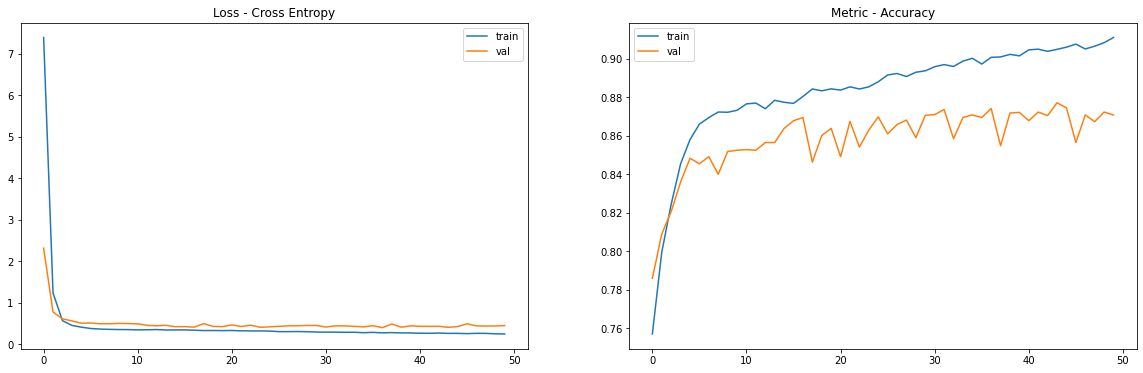

In [109]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [110]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.8708333373069763 0.4454553723335266


In [111]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [112]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 7 ... 2 0 7]


# Armo CSV para submitear

In [113]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')